In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.set_printoptions(suppress=True)

## Load the dataset and set-up the labels

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
## Plot a random image

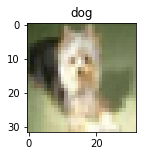

In [4]:
i=182
label = y_train[i]
image = x_train[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title((labels[int(label)]))
plt.imshow(image)
plt.show()

## Normalise and reshape the input data

In [ ]:
y_input = tf.keras.utils.to_categorical(y_train)
x_input = (np.reshape(x_train, (x_train.shape[0], 3072)) / 255.0).astype(np.float32)

## Create the 2-layer neural network

In [ ]:
layer1 = tf.keras.layers.Dense(units=512, activation=tf.nn.relu)
layer2 = tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
def predict(x):
    # input Layer
    middle_layer = layer1(x)

    # logits Layer
    output_layer = layer2(middle_layer)
    return output_layer

## Define the loss function as the cross-entropy loss

In [ ]:
@tf.function
def loss(x,y):
    y_ = predict(x)
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))
    return cross_entropy

## Create the training routines

In [ ]:
lr = 0.001
train_steps = 2500
# we'll use the Adam optimizer instead of gradient descent.
optimizer = tf.optimizers.Adam(lr)

## Now we run the training

In [14]:
for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(x_input,y_input)
        gradients = tape.gradient(current_loss, tape.watched_variables())
        optimizer.apply_gradients(zip(gradients, tape.watched_variables()))
        if i%100 == 0:
            print('Training Step:' + str(i) + ' Loss = ' + str(current_loss))


Training Step:0 Loss = tf.Tensor(1.6787742, shape=(), dtype=float32)
Training Step:100 Loss = tf.Tensor(1.6106625, shape=(), dtype=float32)
Training Step:200 Loss = tf.Tensor(1.5358075, shape=(), dtype=float32)
Training Step:300 Loss = tf.Tensor(1.479815, shape=(), dtype=float32)
Training Step:400 Loss = tf.Tensor(1.4277787, shape=(), dtype=float32)
Training Step:500 Loss = tf.Tensor(1.3872489, shape=(), dtype=float32)
Training Step:600 Loss = tf.Tensor(1.3525572, shape=(), dtype=float32)
Training Step:700 Loss = tf.Tensor(1.3234438, shape=(), dtype=float32)
Training Step:800 Loss = tf.Tensor(1.3047277, shape=(), dtype=float32)
Training Step:900 Loss = tf.Tensor(1.2788918, shape=(), dtype=float32)
Training Step:1000 Loss = tf.Tensor(1.2523057, shape=(), dtype=float32)
Training Step:1100 Loss = tf.Tensor(1.2338762, shape=(), dtype=float32)
Training Step:1200 Loss = tf.Tensor(1.2160321, shape=(), dtype=float32)
Training Step:1300 Loss = tf.Tensor(1.214562, shape=(), dtype=float32)
Traini

## Print out the accuracy on the training data

In [15]:
y_prob = predict(x_input).numpy()

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('train accuracy: ', np.sum(y_pred==y_train[:,0])/len(y_train))

(50000, 10)
train accuracy:  0.6239


## Test on the test data

In [16]:

## shallow should be around 0.4 accuracy
x_test_input = (np.reshape(x_test, (x_test.shape[0], 3072)) / 255.0).astype(np.float32)

y_prob = predict(x_test_input).numpy()

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('test accuracy: ', np.sum(y_pred==y_test[:,0])/len(y_test))

(10000, 10)
test accuracy:  0.4971


## Plot a few images with their classification

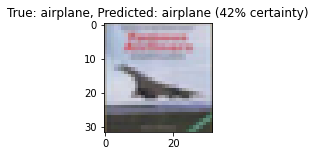

In [23]:
i=3

label = y_test[i]
image = x_test[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title('True: %s, Predicted: %s (%d%% certainty)' % (labels[int(label)],labels[y_prob[i].argmax()],100*y_prob[i,y_prob[i].argmax()]))
plt.imshow(image)
plt.show()